## Author Nevena Mitic

This project focuses on deep learning algorithms for Sentiment Labelled Sentences.
Data used for this project are from UCI Machine Learning Repository "https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#"

This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

It contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants

### Format

sentence \t score \n


### Details:
Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields:

imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.

### Read, pre-process and Merge Data

In [1]:
import pandas as pd
import numpy as np

def rename_columns(data, col1, col2):
    {
        data.rename(
          columns={
            0 : col1,
            1 : col2
        },
          inplace=True
        )
    }


file1 = "C:/Users/Ivan/Desktop/TensorFlow/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt"
file2 = "C:/Users/Ivan/Desktop/TensorFlow/sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt"
file3 = "C:/Users/Ivan/Desktop/TensorFlow/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt"
amazon_data = pd.read_csv(file1, sep='\t+', header=None, engine='python')
imdb_data = pd.read_csv(file2, sep='\t+', header=None, engine='python')
yelp_data =  pd.read_csv(file3, sep='\t+', header=None, engine='python')

# rename columns
rename_columns(amazon_data,'sentence', 'label')
rename_columns(imdb_data,'sentence', 'label')
rename_columns(yelp_data,'sentence', 'label')

#print(amazon_data.head(5))

#amazon_data.dtypes
all_data = pd.concat([amazon_data, imdb_data, yelp_data])

all_data.shape
sentences = all_data.values[:,0]
labels = all_data.values[:,1]


### Split Data into training and testing sets

In [2]:
training_size = 2100

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [3]:
#!pip install tensorflow==2.0.0
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
vocab_size = 100
embedding_dim = 32
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#    lambda epoch: 1e-8 * 10**(epoch / 20))
#optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 32)           3200      
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 21,425
Trainable params: 21,425
Non-trainable params: 0
_________________________________________________________________


In [5]:
num_epochs = 25
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=1)


Train on 2100 samples, validate on 900 samples
Epoch 1/25
2100/2100 [==============================] - 7s 3ms/sample - loss: 0.6914 - accuracy: 0.5371 - val_loss: 0.6860 - val_accuracy: 0.6111
Epoch 2/25
2100/2100 [==============================] - 5s 3ms/sample - loss: 0.6315 - accuracy: 0.6490 - val_loss: 0.6109 - val_accuracy: 0.6600
Epoch 3/25
2100/2100 [==============================] - 6s 3ms/sample - loss: 0.5588 - accuracy: 0.7019 - val_loss: 0.5802 - val_accuracy: 0.6611
Epoch 4/25
2100/2100 [==============================] - 6s 3ms/sample - loss: 0.5401 - accuracy: 0.7105 - val_loss: 0.5704 - val_accuracy: 0.6889
Epoch 5/25
2100/2100 [==============================] - 5s 3ms/sample - loss: 0.5316 - accuracy: 0.7152 - val_loss: 0.5656 - val_accuracy: 0.6767
Epoch 6/25
2100/2100 [==============================] - 6s 3ms/sample - loss: 0.5271 - accuracy: 0.7152 - val_loss: 0.5668 - val_accuracy: 0.6689
Epoch 7/25
2100/2100 [==============================] - 6s 3ms/sample - loss:

### Evaluate Model

In [6]:
# Evaluate model
scores = model.evaluate(testing_padded, testing_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 67.78%


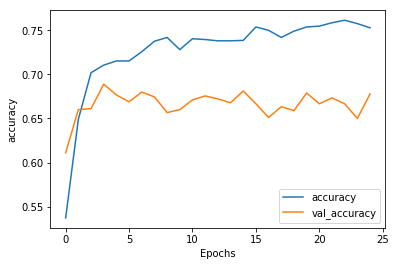

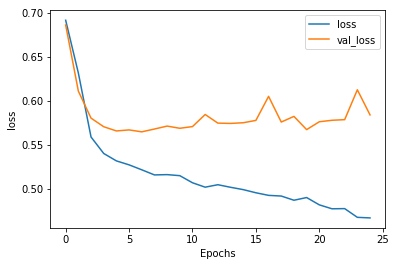

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')



### Summary

 - In Read data section, we've loaded data from three files and merged all data into one dataframe. 
 - In split data section, we've created train and test data (ratio 70:30)
 - We built LSTM network
 - We trained for 25 epochs and reached accuracy 67.78

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 32)           3200      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 120, 64)           16640     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 46,257
Trainable params: 46,257
Non-trainable params: 0
_________________________________________________________________
Train on 2100 samples, validate on 900 samples
Epoch 1/10
2100/2100 [==============================] - 20s 9ms/sampl

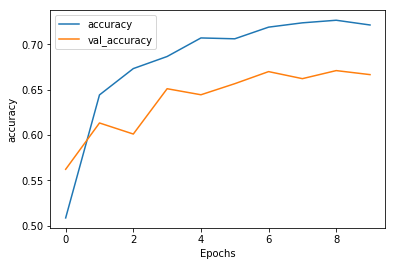

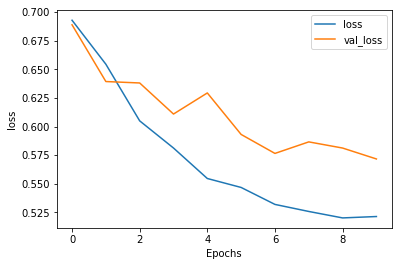

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=1)

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')